In [232]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt

In [233]:
df=pd.read_csv('healthcare-dataset-stroke-data.csv')

In [234]:
df.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

In [235]:
df.shape

(5110, 12)

In [236]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [237]:
X = df.drop(['stroke'],axis=1)
y = df[['stroke']]

In [238]:
X.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  
0        Private          Urban             228.69  36.6  formerly smoked  
1  Self-employed          Rural             202.21   NaN     never smoked  
2        Private          Rural             105.92  32.5     never smoked  
3        Private          Urban             171.23  34.4           smokes  
4  Self-employed          Rural             174.12  24.0     never smoked

In [239]:
y.mean()

stroke    0.048728
dtype: float64

In [240]:
#dropping id columns
X_wo_ids = X.drop(['id'],axis=1)
X_wo_ids.head()

gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1  Female  61.0             0              0          Yes  Self-employed   
2    Male  80.0             0              1          Yes        Private   
3  Female  49.0             0              0          Yes        Private   
4  Female  79.0             1              0          Yes  Self-employed   

  Residence_type  avg_glucose_level   bmi   smoking_status  
0          Urban             228.69  36.6  formerly smoked  
1          Rural             202.21   NaN     never smoked  
2          Rural             105.92  32.5     never smoked  
3          Urban             171.23  34.4           smokes  
4          Rural             174.12  24.0     never smoked

In [241]:
#check null values  
X_wo_ids.isnull().mean()

gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  0.039335
smoking_status       0.000000
dtype: float64

## Encode numerical feature

In [242]:
num = X_wo_ids.select_dtypes(include='number')
num.describe()

age  hypertension  heart_disease  avg_glucose_level  \
count  5110.000000   5110.000000    5110.000000        5110.000000   
mean     43.226614      0.097456       0.054012         106.147677   
std      22.612647      0.296607       0.226063          45.283560   
min       0.080000      0.000000       0.000000          55.120000   
25%      25.000000      0.000000       0.000000          77.245000   
50%      45.000000      0.000000       0.000000          91.885000   
75%      61.000000      0.000000       0.000000         114.090000   
max      82.000000      1.000000       1.000000         271.740000   

               bmi  
count  4909.000000  
mean     28.893237  
std       7.854067  
min      10.300000  
25%      23.500000  
50%      28.100000  
75%      33.100000  
max      97.600000

In [243]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
num_1=pd.DataFrame(imputer.fit_transform(num),index=num.index,columns=num.columns)
num_1.head()

age  hypertension  heart_disease  avg_glucose_level        bmi
0  67.0           0.0            1.0             228.69  36.600000
1  61.0           0.0            0.0             202.21  28.893237
2  80.0           0.0            1.0             105.92  32.500000
3  49.0           0.0            0.0             171.23  34.400000
4  79.0           1.0            0.0             174.12  24.000000

In [244]:
def outlier_capping(x):
    x = x.clip(upper=x.quantile(0.99))
    x = x.clip(lower=x.quantile(0.01))
    return x

In [245]:
num_1=num_1.apply(lambda x: outlier_capping(x))
num_1.describe(percentiles=[0.01,0.05,0.25,0.50,0.75,0.90,0.99])

age  hypertension  heart_disease  avg_glucose_level  \
count  5110.000000   5110.000000    5110.000000        5110.000000   
mean     43.231429      0.097456       0.054012         106.047192   
std      22.603599      0.296607       0.226063          44.940759   
min       1.080000      0.000000       0.000000          56.330900   
1%        1.080000      0.000000       0.000000          56.331719   
5%        5.000000      0.000000       0.000000          60.713500   
25%      25.000000      0.000000       0.000000          77.245000   
50%      45.000000      0.000000       0.000000          91.885000   
75%      61.000000      0.000000       0.000000         114.090000   
90%      75.000000      0.000000       0.000000         192.181000   
99%      82.000000      1.000000       1.000000         240.706562   
max      82.000000      1.000000       1.000000         240.708200   

               bmi  
count  5110.000000  
mean     28.842239  
std       7.405801  
min      15.109000  
1%       15.117190  
5%       17.700000  
25%      23.800000  
50%      28.400000  
75%      32.800000  
90%      38.700000  
99%      52.882810  
max      52.891000

## Encode categorical feature

In [246]:
char = X_wo_ids.select_dtypes(include='object')
char.head()

gender ever_married      work_type Residence_type   smoking_status
0    Male          Yes        Private          Urban  formerly smoked
1  Female          Yes  Self-employed          Rural     never smoked
2    Male          Yes        Private          Rural     never smoked
3  Female          Yes        Private          Urban           smokes
4  Female          Yes  Self-employed          Rural     never smoked

In [247]:
char_encode = pd.get_dummies(char,drop_first=True)
char_encode.head()

gender_Male  gender_Other  ever_married_Yes  work_type_Never_worked  \
0            1             0                 1                       0   
1            0             0                 1                       0   
2            1             0                 1                       0   
3            0             0                 1                       0   
4            0             0                 1                       0   

   work_type_Private  work_type_Self-employed  work_type_children  \
0                  1                        0                   0   
1                  0                        1                   0   
2                  1                        0                   0   
3                  1                        0                   0   
4                  0                        1                   0   

   Residence_type_Urban  smoking_status_formerly smoked  \
0                     1                               1   
1                     0                               0   
2                     0                               0   
3                     1                               0   
4                     0                               0   

   smoking_status_never smoked  smoking_status_smokes  
0                            0                      0  
1                            1                      0  
2                            1                      0  
3                            0                      1  
4                            1                      0

## Feature Discretization

In [248]:
from sklearn.preprocessing import KBinsDiscretizer
Bins=KBinsDiscretizer(n_bins=5,encode='ordinal',strategy='quantile')
X_binned=pd.DataFrame(Bins.fit_transform(num_1),index=num_1.index, columns=num_1.columns).add_suffix('_Bin')
X_binned.describe()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:200: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.
  warnings.warn('Bins whose width are too small (i.e., <= '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:200: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 2 are removed. Consider decreasing the number of bins.
  warnings.warn('Bins whose width are too small (i.e., <= '


age_Bin  hypertension_Bin  heart_disease_Bin  \
count  5110.000000            5110.0             5110.0   
mean      2.031507               0.0                0.0   
std       1.407967               0.0                0.0   
min       0.000000               0.0                0.0   
25%       1.000000               0.0                0.0   
50%       2.000000               0.0                0.0   
75%       3.000000               0.0                0.0   
max       4.000000               0.0                0.0   

       avg_glucose_level_Bin      bmi_Bin  
count            5110.000000  5110.000000  
mean                2.000783     2.006849  
std                 1.414213     1.414405  
min                 0.000000     0.000000  
25%                 1.000000     1.000000  
50%                 2.000000     2.000000  
75%                 3.000000     3.000000  
max                 4.000000     4.000000

In [249]:
X_binned=pd.concat([X_binned,y],axis=1,join="inner")
X_binned

age_Bin  hypertension_Bin  heart_disease_Bin  avg_glucose_level_Bin  \
0         4.0               0.0                0.0                    4.0   
1         3.0               0.0                0.0                    4.0   
2         4.0               0.0                0.0                    3.0   
3         2.0               0.0                0.0                    4.0   
4         4.0               0.0                0.0                    4.0   
...       ...               ...                ...                    ...   
5105      4.0               0.0                0.0                    1.0   
5106      4.0               0.0                0.0                    4.0   
5107      1.0               0.0                0.0                    1.0   
5108      3.0               0.0                0.0                    4.0   
5109      2.0               0.0                0.0                    1.0   

      bmi_Bin  stroke  
0         4.0       1  
1         2.0       1  
2         3.0       1  
3         4.0       1  
4         1.0       1  
...       ...     ...  
5105      2.0       0  
5106      4.0       0  
5107      3.0       0  
5108      1.0       0  
5109      1.0       0  

[5110 rows x 6 columns]

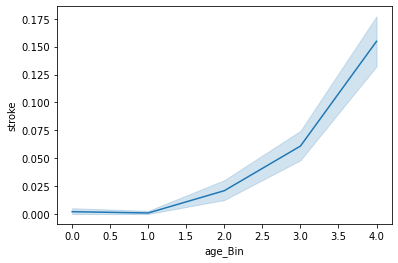

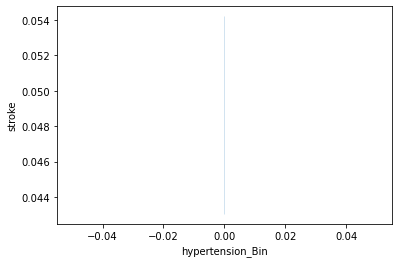

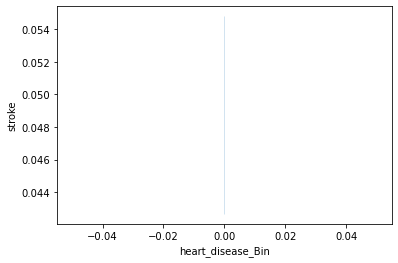

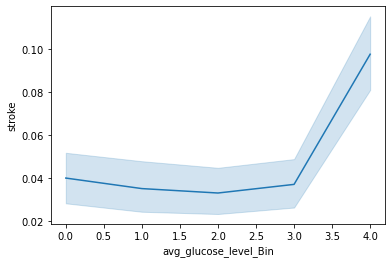

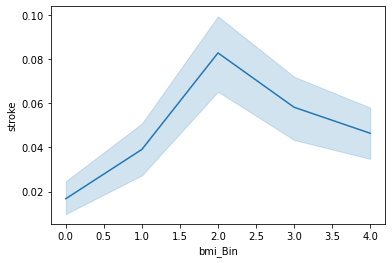

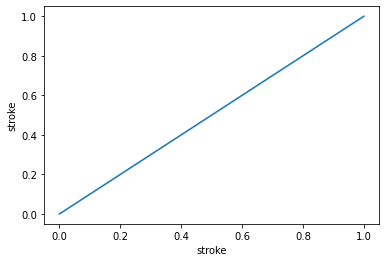

In [250]:
import matplotlib.pyplot as plt
from numpy import mean
for col in (X_binned.columns):
    plt.figure()
    ax=sns.lineplot(x=col,y='stroke',data=X_binned,estimator=mean)
    plt.show()

In [251]:
num_2 = num_1.drop(['hypertension','heart_disease'],axis=1)
num_2.head()

age  avg_glucose_level        bmi
0  67.0             228.69  36.600000
1  61.0             202.21  28.893237
2  80.0             105.92  32.500000
3  49.0             171.23  34.400000
4  79.0             174.12  24.000000

In [252]:
char_feature_check=pd.concat([char,y],axis=1,join="inner")

<Figure size 432x288 with 0 Axes>

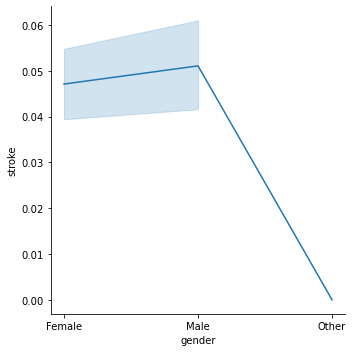

<Figure size 432x288 with 0 Axes>

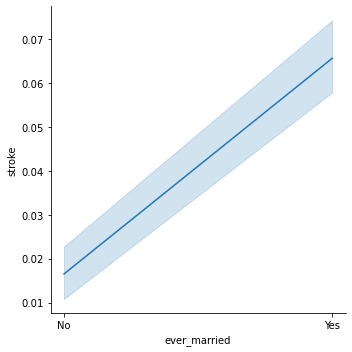

<Figure size 432x288 with 0 Axes>

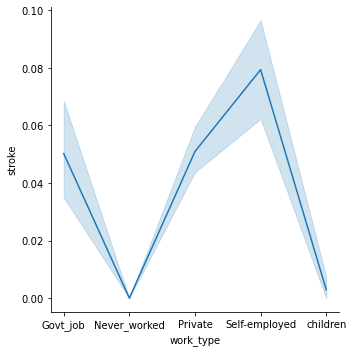

<Figure size 432x288 with 0 Axes>

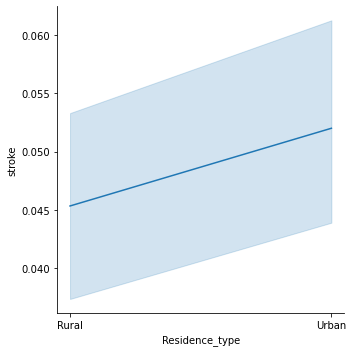

<Figure size 432x288 with 0 Axes>

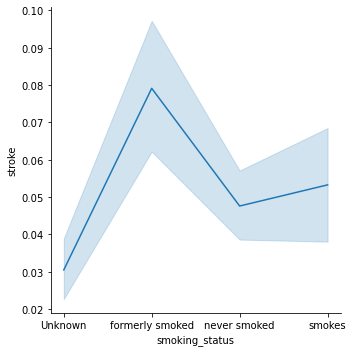

<Figure size 432x288 with 0 Axes>

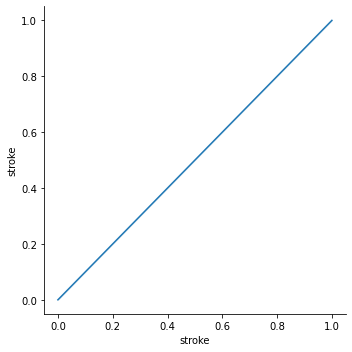

In [253]:
import matplotlib.pyplot as plt
from numpy import mean
for col in (char_feature_check.columns):
    plt.figure()
    ax=sns.relplot(x=col,y='stroke',data=char_feature_check,kind='line',estimator=mean)
    plt.show()

## Final DataSet For ModelBuilding

In [254]:
X_all = pd.concat([num_2,char_encode],axis=1,join='inner')
X_all.head()

age  avg_glucose_level        bmi  gender_Male  gender_Other  \
0  67.0             228.69  36.600000            1             0   
1  61.0             202.21  28.893237            0             0   
2  80.0             105.92  32.500000            1             0   
3  49.0             171.23  34.400000            0             0   
4  79.0             174.12  24.000000            0             0   

   ever_married_Yes  work_type_Never_worked  work_type_Private  \
0                 1                       0                  1   
1                 1                       0                  0   
2                 1                       0                  1   
3                 1                       0                  1   
4                 1                       0                  0   

   work_type_Self-employed  work_type_children  Residence_type_Urban  \
0                        0                   0                     1   
1                        1                   0                     0   
2                        0                   0                     0   
3                        0                   0                     1   
4                        1                   0                     0   

   smoking_status_formerly smoked  smoking_status_never smoked  \
0                               1                            0   
1                               0                            1   
2                               0                            1   
3                               0                            0   
4                               0                            1   

   smoking_status_smokes  
0                      0  
1                      0  
2                      0  
3                      1  
4                      0

## Feature Scaling

In [255]:
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X_std = pd.DataFrame(sc.fit_transform(X_all),index=X_all.index, columns=X_all.columns).add_suffix('_std')

In [256]:
#X_std.shape

In [257]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X_all,y, test_size=0.2,random_state=40)

In [258]:
y_train.mean()

stroke    0.050391
dtype: float64

In [259]:
y_test.mean()

stroke    0.042074
dtype: float64

In [260]:
X_test.shape

(1022, 14)

In [261]:
X_train.shape

(4088, 14)

## RandomForest Implementation

In [262]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

<ipython-input-262-4fb9db1ddab0>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


RandomForestClassifier()

In [263]:
y_pred=rf.predict(X_test)

In [264]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision",metrics.precision_score(y_test,y_pred))
print("Recall",metrics.recall_score(y_test,y_pred))
print("f1_score",metrics.f1_score(y_test,y_pred))

Accuracy: 0.9569471624266145
Precision 0.0
Recall 0.0
f1_score 0.0


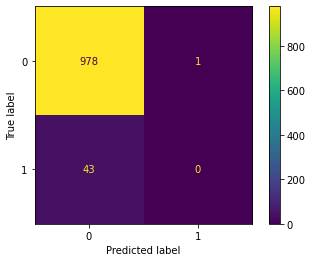

In [265]:
metrics.plot_confusion_matrix(rf,X_test,y_test)

In [266]:
metrics.roc_auc_score(y_test,y_pred)

0.49948927477017363

## Visualizing model

In [267]:
y_pred_prob = rf.predict_proba(X_all)[:, 1]
df['y_pred_P']=pd.DataFrame(y_pred_prob)
df['P_Rank']=pd.qcut(df['y_pred_P'].rank(method='first').values,10,duplicates='drop').codes+1
rank_df=df.groupby('P_Rank')['stroke'].agg(['count','mean'])
rank_df=pd.DataFrame(rank_df)
sorted_rank_df=rank_df.sort_values(by='P_Rank',ascending=False)
sorted_rank_df['N_events']=rank_df['count']*rank_df['mean']
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum()
sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()
sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum())
sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum()
sorted_rank_df
sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed['decile']=sorted_reindexed.index+1
sorted_reindexed['lift_over_random']=sorted_reindexed['cum_event_cap']/sorted_reindexed['cum_random_cap']
sorted_reindexed

P_Rank  count      mean  N_events  cum_events  event_cap  cum_event_cap  \
0      10    511  0.432485     221.0       221.0   0.887550       0.887550   
1       9    511  0.031311      16.0       237.0   0.064257       0.951807   
2       8    511  0.005871       3.0       240.0   0.012048       0.963855   
3       7    511  0.001957       1.0       241.0   0.004016       0.967871   
4       6    511  0.007828       4.0       245.0   0.016064       0.983936   
5       5    511  0.000000       0.0       245.0   0.000000       0.983936   
6       4    511  0.000000       0.0       245.0   0.000000       0.983936   
7       3    511  0.000000       0.0       245.0   0.000000       0.983936   
8       2    511  0.000000       0.0       245.0   0.000000       0.983936   
9       1    511  0.007828       4.0       249.0   0.016064       1.000000   

   random_cap  cum_random_cap  decile  lift_over_random  
0         0.1             0.1       1          8.875502  
1         0.1             0.2       2          4.759036  
2         0.1             0.3       3          3.212851  
3         0.1             0.4       4          2.419679  
4         0.1             0.5       5          1.967871  
5         0.1             0.6       6          1.639893  
6         0.1             0.7       7          1.405622  
7         0.1             0.8       8          1.229920  
8         0.1             0.9       9          1.093262  
9         0.1             1.0      10          1.000000

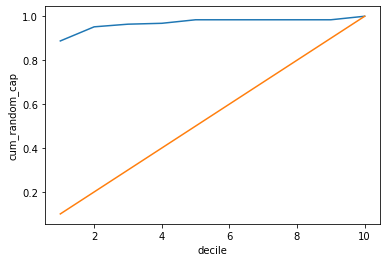

In [268]:
ax = sns.lineplot( x="decile", y="cum_event_cap", data=sorted_reindexed)
ax = sns.lineplot( x="decile", y="cum_random_cap", data=sorted_reindexed)

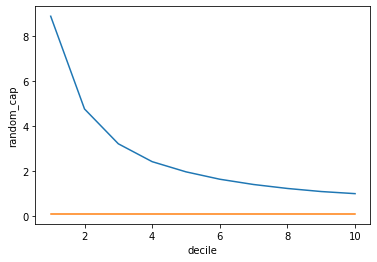

In [269]:
ax = sns.lineplot( x="decile", y="lift_over_random", data=sorted_reindexed)
ax = sns.lineplot( x="decile", y="random_cap", data=sorted_reindexed)

In [270]:
df.groupby('P_Rank')['y_pred_P'].agg(['min','max'])

min   max
P_Rank            
1       0.00  0.00
2       0.00  0.00
3       0.00  0.00
4       0.00  0.00
5       0.00  0.00
6       0.00  0.01
7       0.01  0.02
8       0.02  0.04
9       0.04  0.11
10      0.11  0.85

In [271]:
df.loc[df['P_Rank']==10,:]

id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
2     31112    Male  80.0             0              1          Yes   
4      1665  Female  79.0             1              0          Yes   
5     56669    Male  81.0             0              0          Yes   
7     10434  Female  69.0             0              0           No   
...     ...     ...   ...           ...            ...          ...   
5034  65405  Female  79.0             0              0           No   
5060  60271    Male  78.0             0              0          Yes   
5068  49598    Male  80.0             0              0          Yes   
5071  52652    Male  81.0             0              0          Yes   
5084  29540    Male  67.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  formerly smoked   
2           Private          Rural             105.92  32.5     never smoked   
4     Self-employed          Rural             174.12  24.0     never smoked   
5           Private          Urban             186.21  29.0  formerly smoked   
7           Private          Urban              94.39  22.8     never smoked   
...             ...            ...                ...   ...              ...   
5034        Private          Urban             253.86  28.8  formerly smoked   
5060        Private          Urban              60.22  29.7  formerly smoked   
5068  Self-employed          Urban             120.03  24.3  formerly smoked   
5071        Private          Rural             135.32  35.8          Unknown   
5084        Private          Rural              97.04  26.9           smokes   

      stroke  y_pred_P  P_Rank  
0          1      0.62      10  
2          1      0.69      10  
4          1      0.67      10  
5          1      0.30      10  
7          1      0.70      10  
...      ...       ...     ...  
5034       0      0.11      10  
5060       0      0.11      10  
5068       0      0.14      10  
5071       0      0.18      10  
5084       0      0.11      10  

[511 rows x 14 columns]

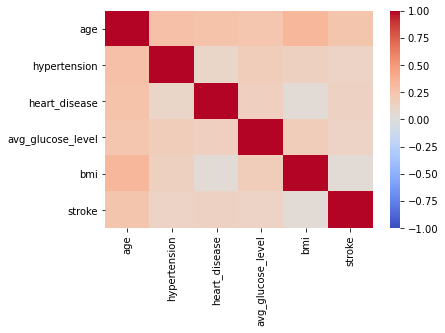

In [272]:
num_data = pd.concat([num_1,y],axis=1)
sns.heatmap(num_data.corr(),vmin=-1,vmax=1,center=0,cmap='coolwarm')

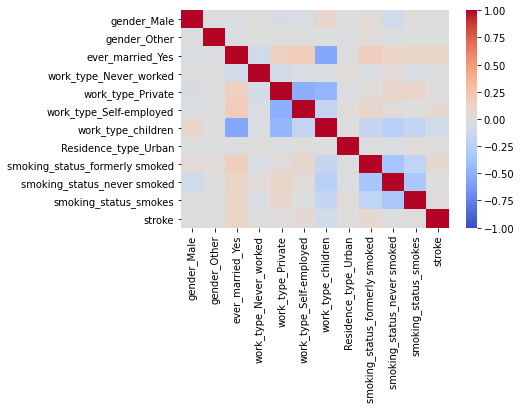

In [273]:
char_encode_data = pd.concat([char_encode,y],axis=1)
sns.heatmap(char_encode_data.corr(),vmin=-1,vmax=1,center=0,cmap='coolwarm')

In [274]:
X_all.corr()

age  avg_glucose_level       bmi  \
age                             1.000000           0.237707  0.338443   
avg_glucose_level               0.237707           1.000000  0.176478   
bmi                             0.338443           0.176478  1.000000   
gender_Male                    -0.027525           0.054952 -0.027647   
gender_Other                   -0.010666           0.011608 -0.012171   
ever_married_Yes                0.679103           0.155026  0.346434   
work_type_Never_worked         -0.078698          -0.014640 -0.029070   
work_type_Private               0.116334           0.016777  0.205660   
work_type_Self-employed         0.328028           0.062735  0.074950   
work_type_children             -0.633929          -0.102071 -0.454122   
Residence_type_Urban            0.014201          -0.004985  0.002658   
smoking_status_formerly smoked  0.236894           0.068047  0.110491   
smoking_status_never smoked     0.119192           0.024199  0.107647   
smoking_status_smokes           0.073072           0.016961  0.087791   

                                gender_Male  gender_Other  ever_married_Yes  \
age                               -0.027525     -0.010666          0.679103   
avg_glucose_level                  0.054952      0.011608          0.155026   
bmi                               -0.027647     -0.012171          0.346434   
gender_Male                        1.000000     -0.011757         -0.029936   
gender_Other                      -0.011757      1.000000         -0.019327   
ever_married_Yes                  -0.029936     -0.019327          1.000000   
work_type_Never_worked             0.011496     -0.000920         -0.090838   
work_type_Private                 -0.032639      0.012092          0.153830   
work_type_Self-employed           -0.025971     -0.006112          0.192716   
work_type_children                 0.089283     -0.005514         -0.544441   
Residence_type_Urban              -0.005937     -0.014217          0.006261   
smoking_status_formerly smoked     0.042738      0.030568          0.171256   
smoking_status_never smoked       -0.098813     -0.010728          0.102845   
smoking_status_smokes              0.011477     -0.005978          0.105226   

                                work_type_Never_worked  work_type_Private  \
age                                          -0.078698           0.116334   
avg_glucose_level                            -0.014640           0.016777   
bmi                                          -0.029070           0.205660   
gender_Male                                   0.011496          -0.032639   
gender_Other                                 -0.000920           0.012092   
ever_married_Yes                             -0.090838           0.153830   
work_type_Never_worked                        1.000000          -0.076081   
work_type_Private                            -0.076081           1.000000   
work_type_Self-employed                      -0.028728          -0.505475   
work_type_children                           -0.025915          -0.455992   
Residence_type_Urban                          0.022859          -0.018173   
smoking_status_formerly smoked               -0.030095           0.025526   
smoking_status_never smoked                   0.036238           0.104860   
smoking_status_smokes                        -0.028099           0.100025   

                                work_type_Self-employed  work_type_children  \
age                                            0.328028           -0.633929   
avg_glucose_level                              0.062735           -0.102071   
bmi                                            0.074950           -0.454122   
gender_Male                                   -0.025971            0.089283   
gender_Other                                  -0.006112           -0.005514   
ever_married_Yes                               0.192716           -0.544441   
work_type_Never_worked                        